In [19]:
import pandas as pd
import wfdb
import matplotlib.pyplot as plt
import numpy as np

In [48]:
record = wfdb.rdrecord("../data/physionet.org.1.0.0/s1_high_resistance_bike")
annotations = wfdb.rdann('../data/physionet.org.1.0.0/s1_high_resistance_bike', 'atr')
signal_data = record.p_signal #What other commands are here?

In [22]:
signal_data.shape

(150785, 15)

In [17]:
annotation_samples = annotations.sample
annotation_samples

array([   199,    410,    618, ..., 150460, 150579, 150695], dtype=int64)

In [25]:
len(signal_data)

150785

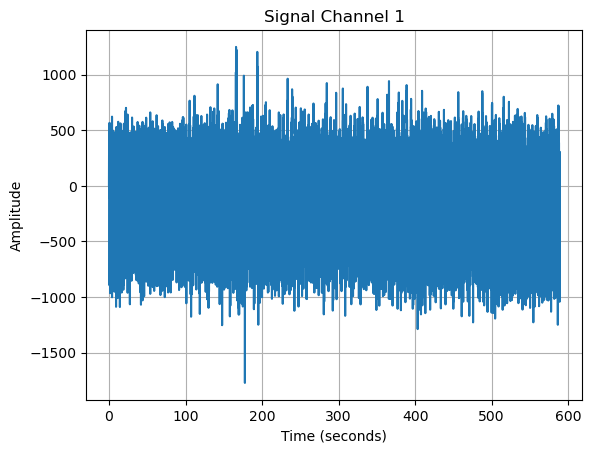

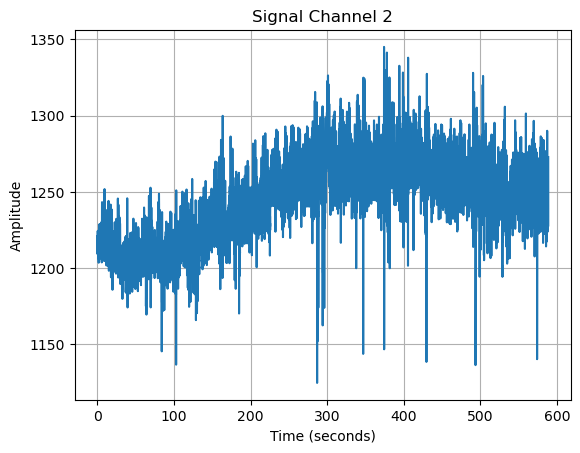

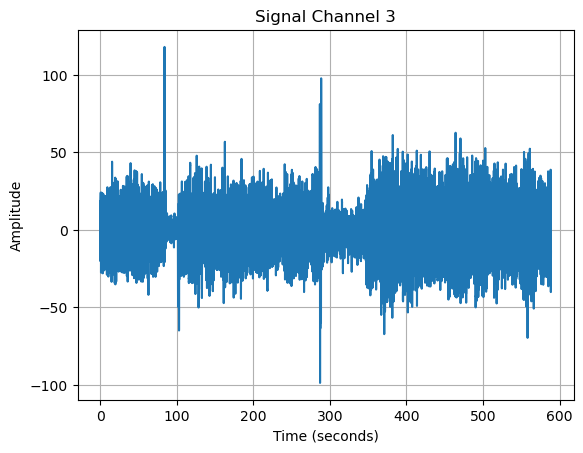

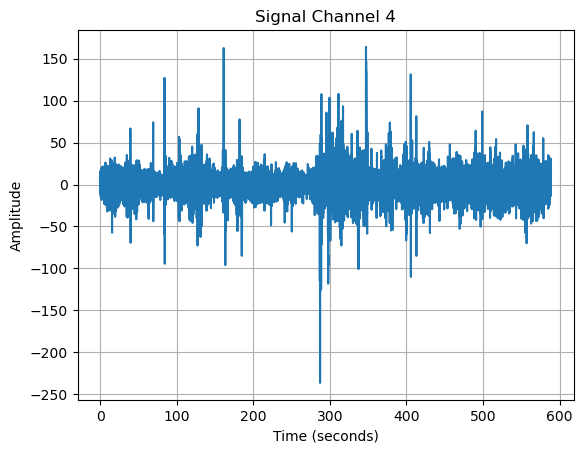

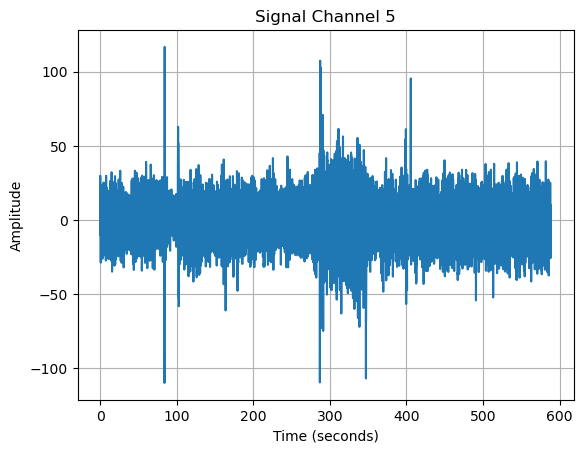

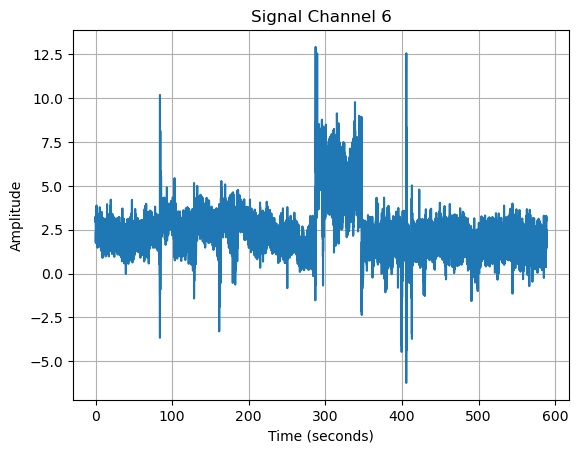

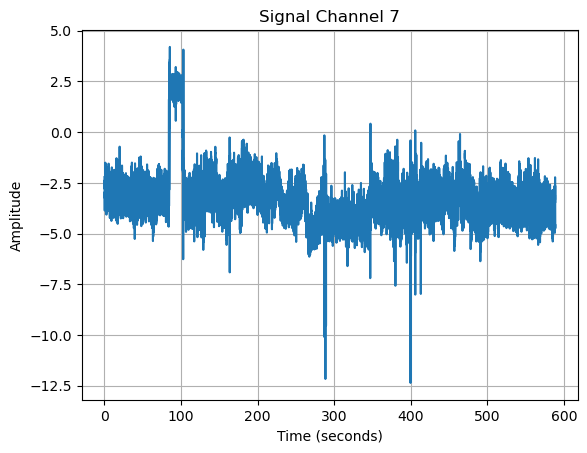

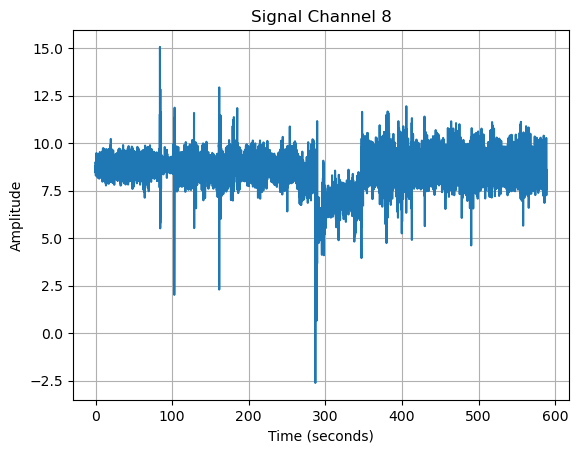

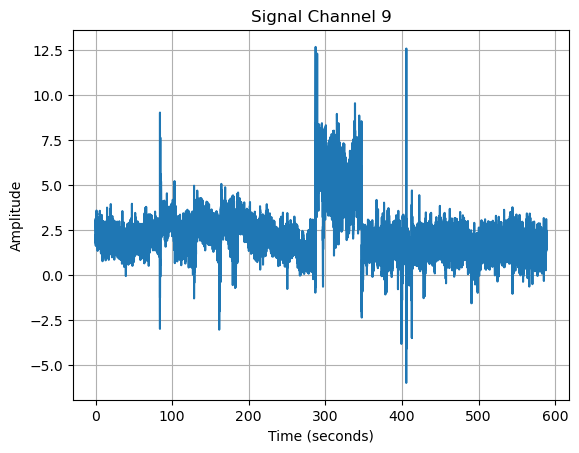

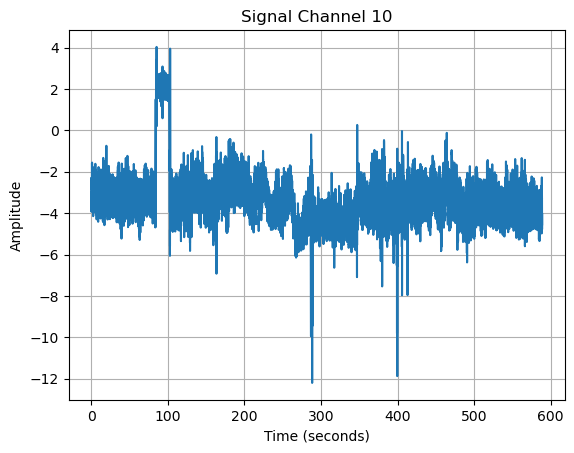

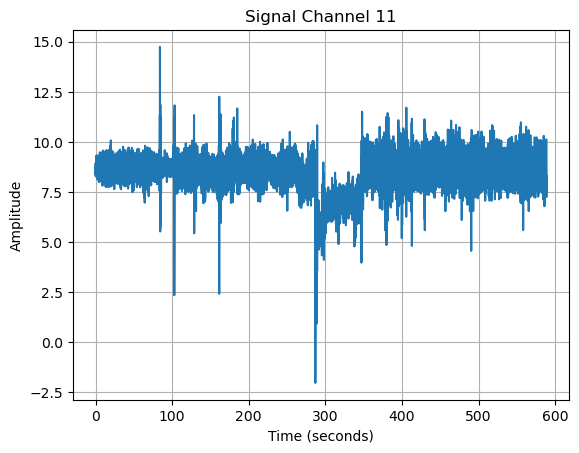

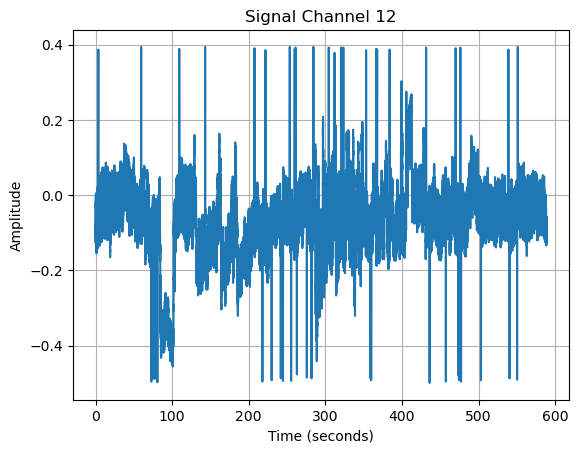

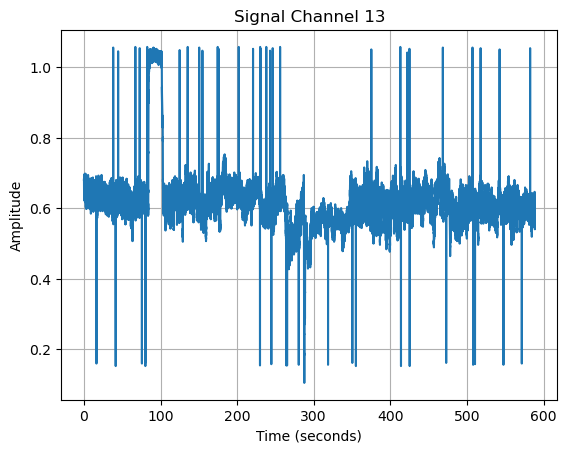

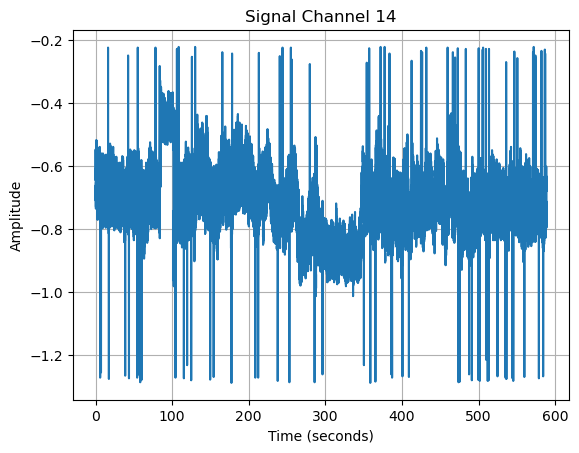

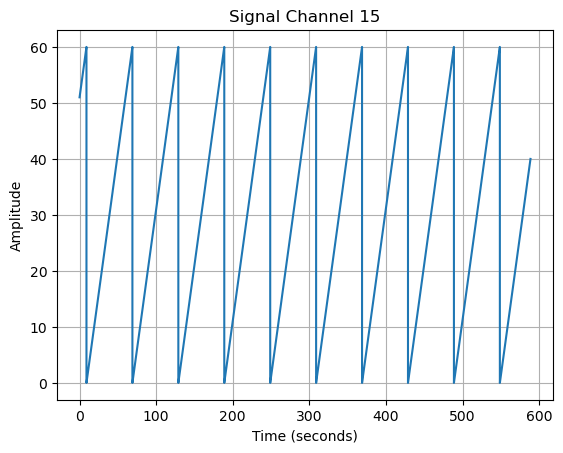

IndexError: index 15 is out of bounds for axis 1 with size 15

<Figure size 640x480 with 0 Axes>

In [20]:
signal_data = record.p_signal

# Get the sampling frequency
sampling_frequency = record.fs

# Create a time axis for plotting
num_samples = len(signal_data)
duration = num_samples / sampling_frequency
time = [i / sampling_frequency for i in range(num_samples)]

# Plot each signal channel
num_channels = record.sig_len
for channel in range(num_channels):
    plt.figure()
    plt.plot(time, signal_data[:, channel])
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.title(f'Signal Channel {channel+1}')
    plt.grid(True)
    plt.show()

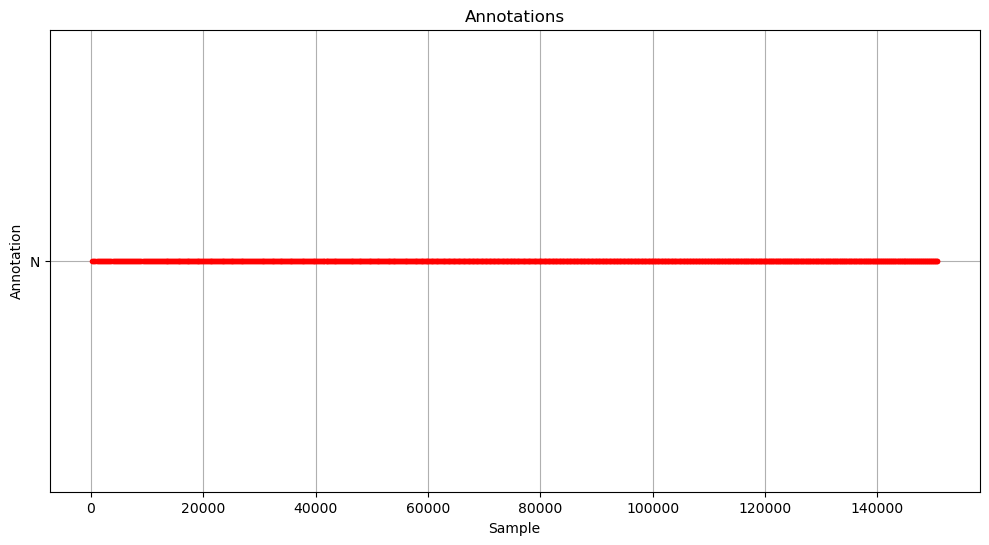

In [23]:
# Plotting the annotations
plt.figure(figsize=(12, 6))
plt.plot(annotations.sample, annotations.symbol, 'ro', markersize=3)
plt.xlabel('Sample')
plt.ylabel('Annotation')
plt.title('Annotations')
plt.grid(True)
plt.show()

In [24]:
# Print unique annotation symbols
unique_symbols = set(annotations.symbol)
print(unique_symbols)

{'N'}


In [28]:
sampling_frequency

256

In [55]:
duration

0.8

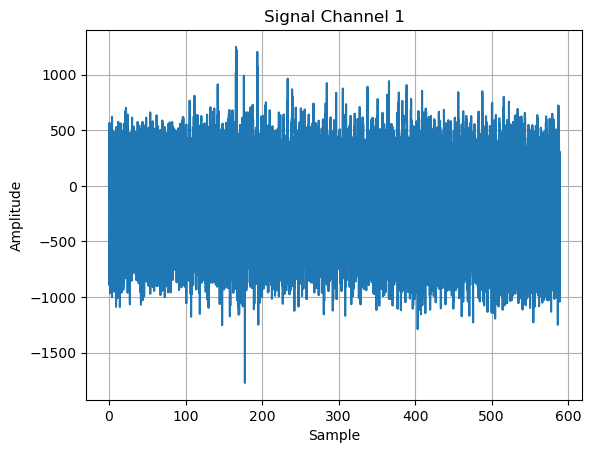

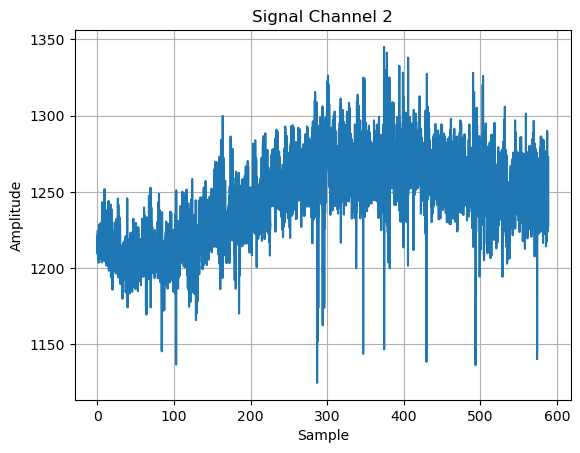

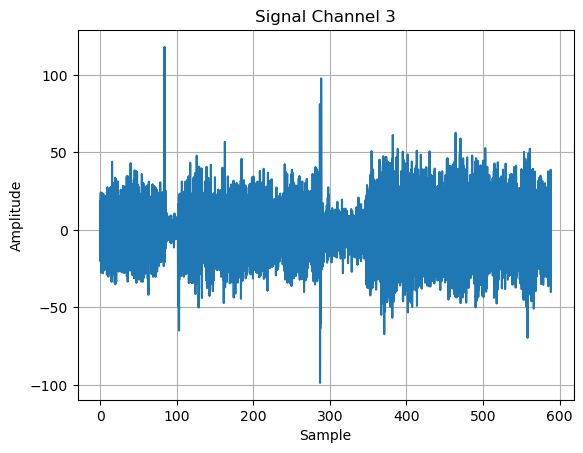

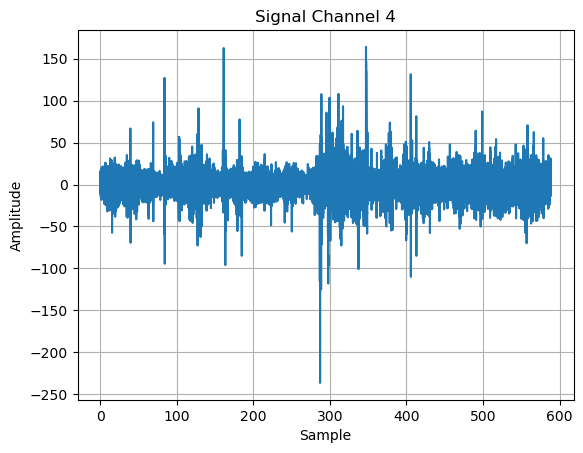

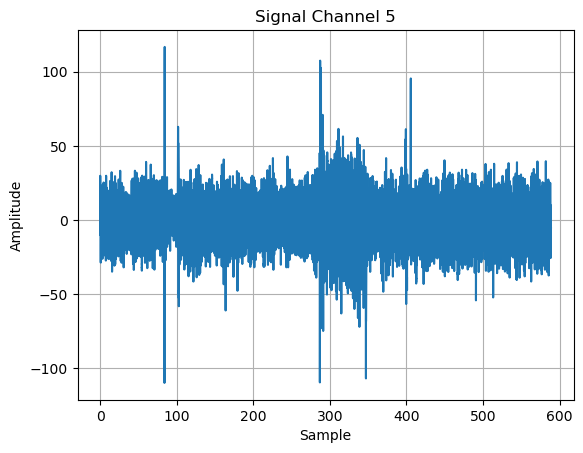

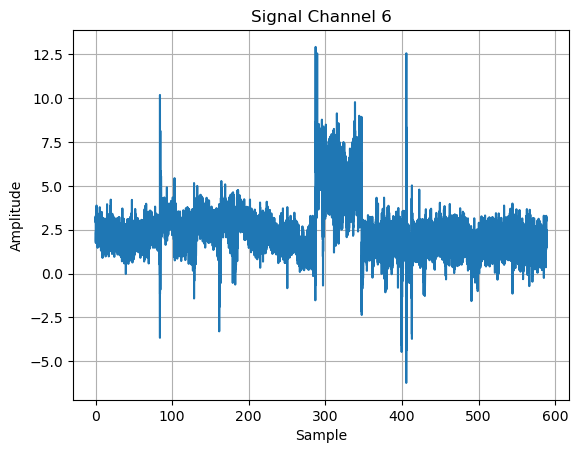

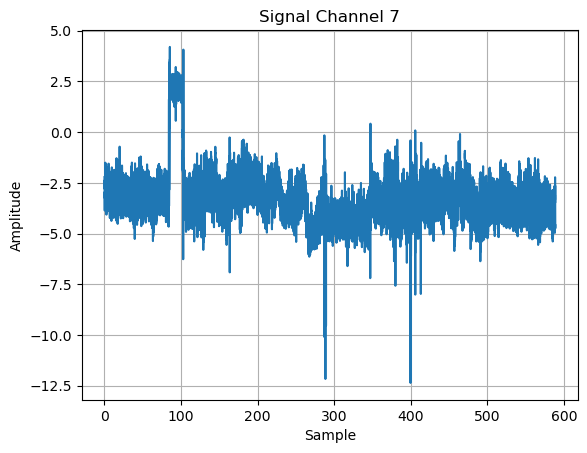

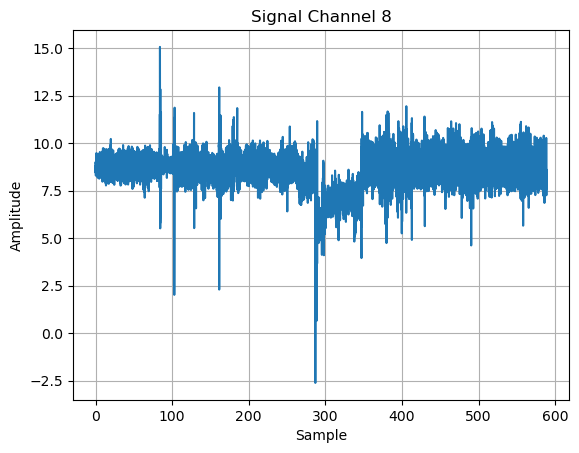

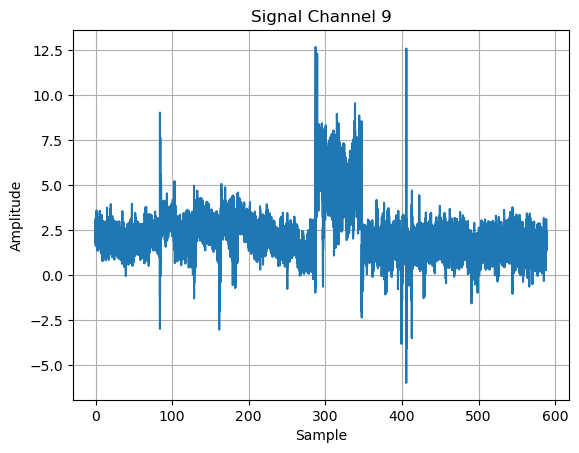

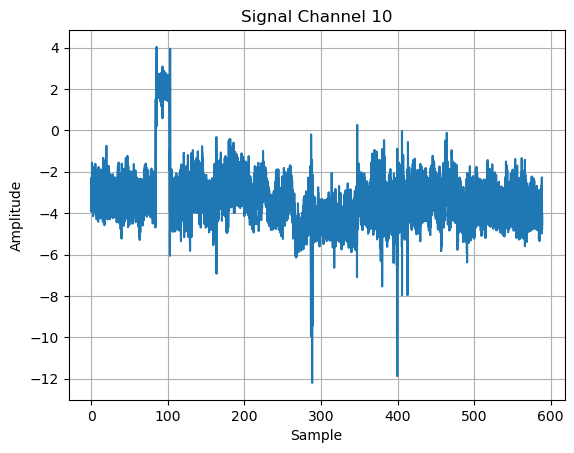

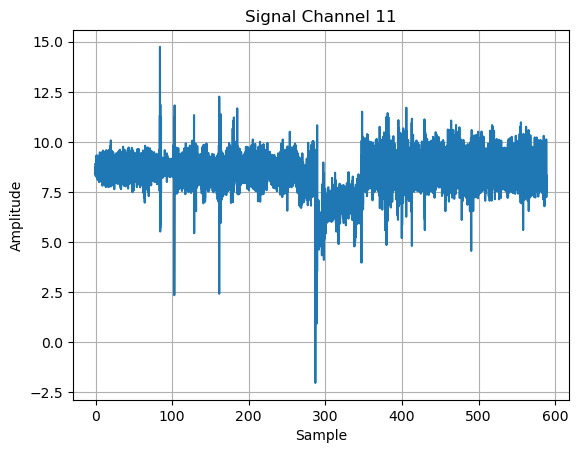

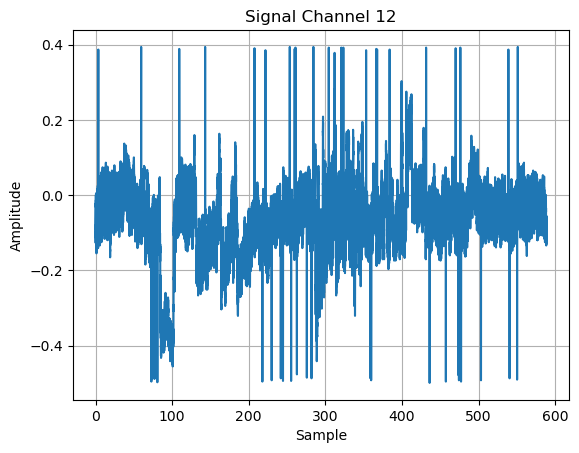

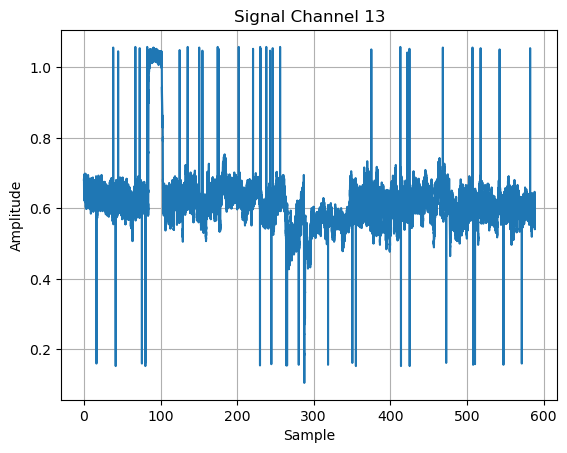

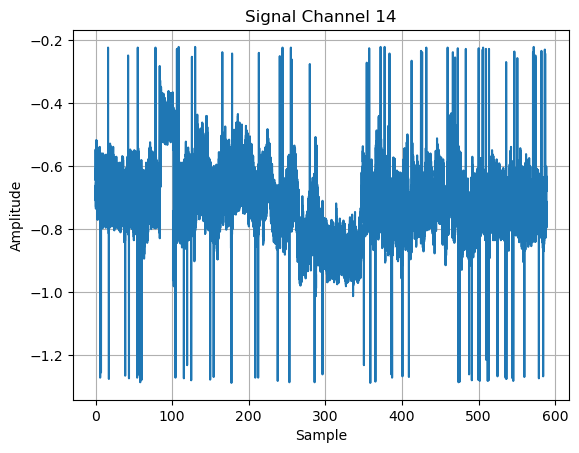

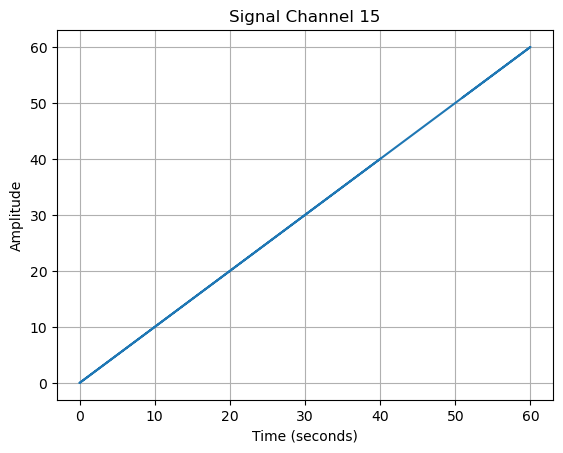

IndexError: index 15 is out of bounds for axis 1 with size 15

<Figure size 640x480 with 0 Axes>

In [57]:
signal_data = record.p_signal

# Get the sampling frequency
sampling_frequency = record.fs

# Get the timing information from channel 14
timing_data = signal_data[:, 14]

# Create a time axis for plotting
num_samples = len(signal_data) #150785
duration = num_samples / sampling_frequency #sampling frquency is 256
time = [i / sampling_frequency for i in range(num_samples)]

# Plot each signal channel
num_channels = record.sig_len
for channel in range(num_channels):
    plt.figure()
    if channel == 14:
        plt.plot(timing_data, signal_data[:, channel])
        plt.xlabel('Time (seconds)')
    else:
        plt.plot(time, signal_data[:, channel])
        plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.title(f'Signal Channel {channel+1}')
    plt.grid(True)
    plt.show()


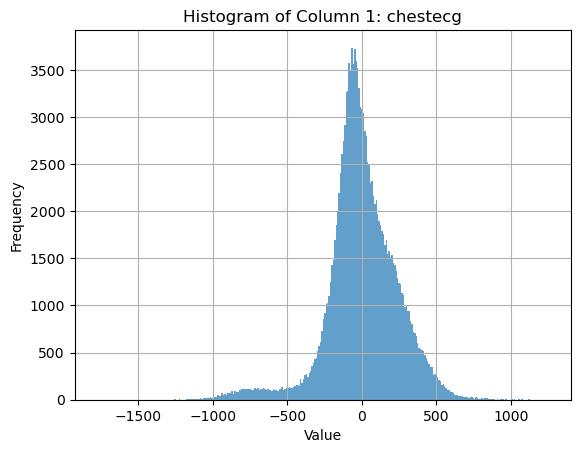

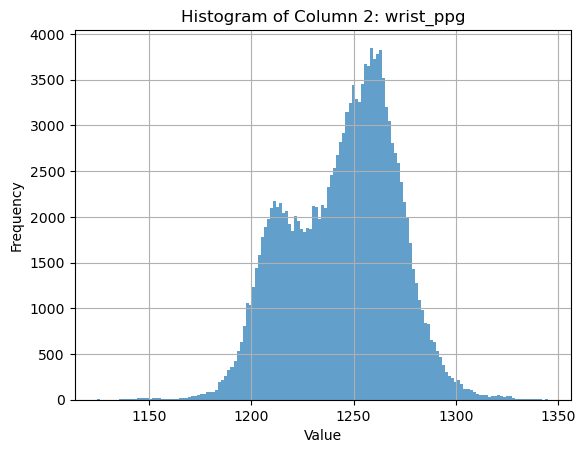

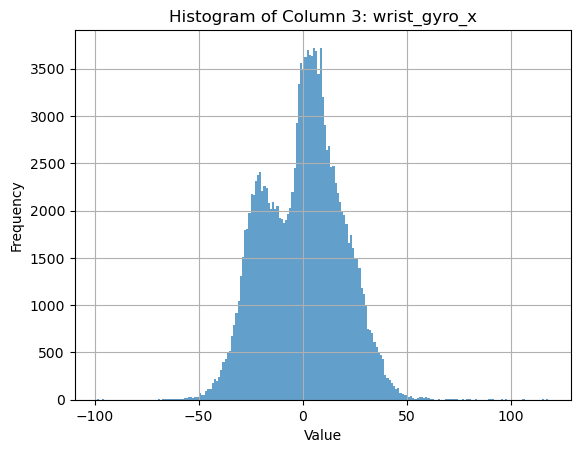

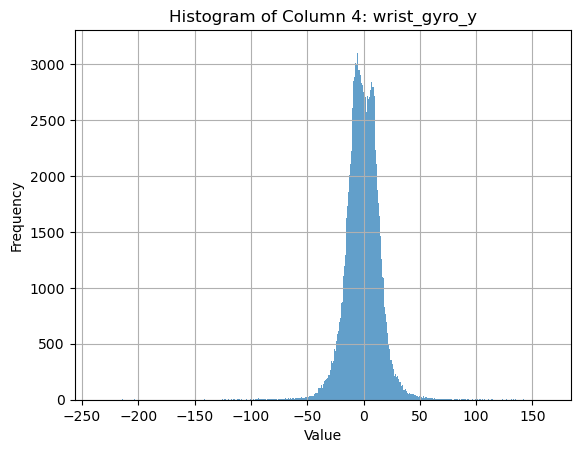

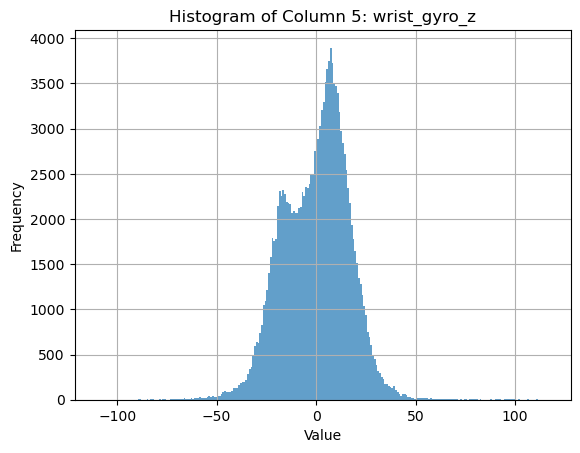

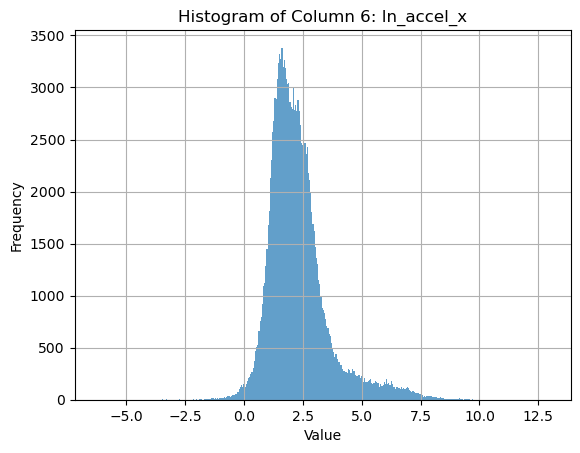

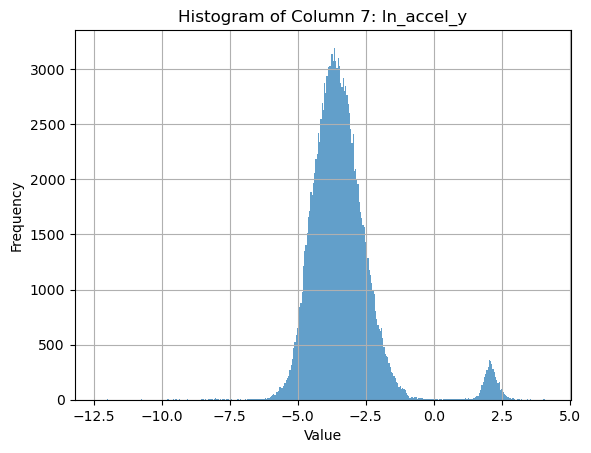

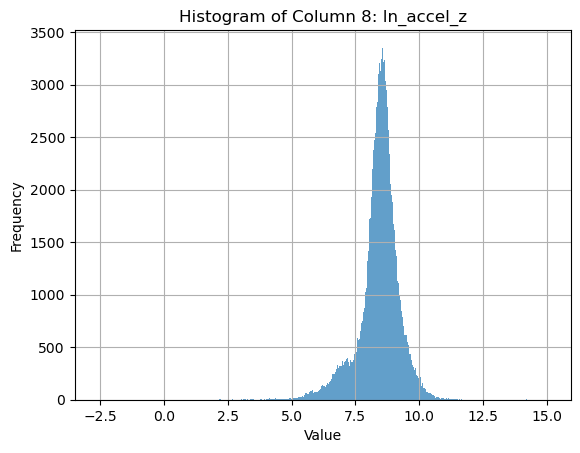

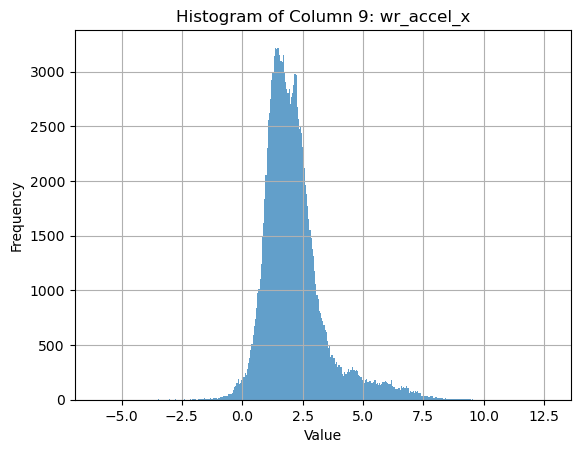

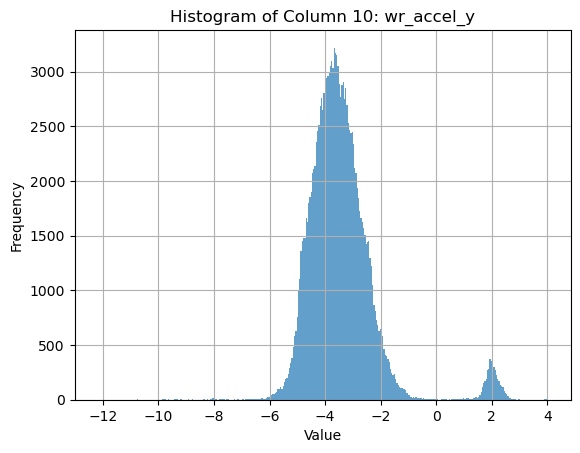

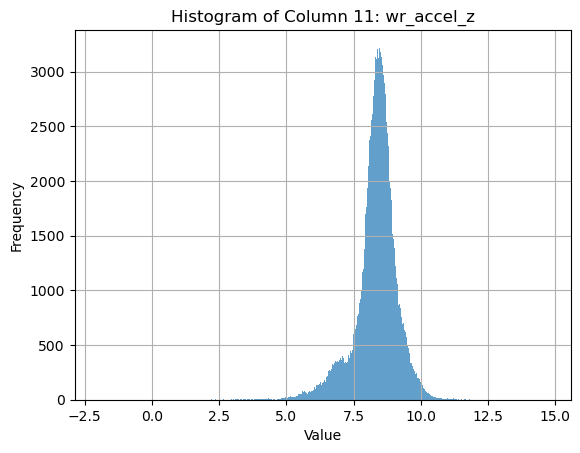

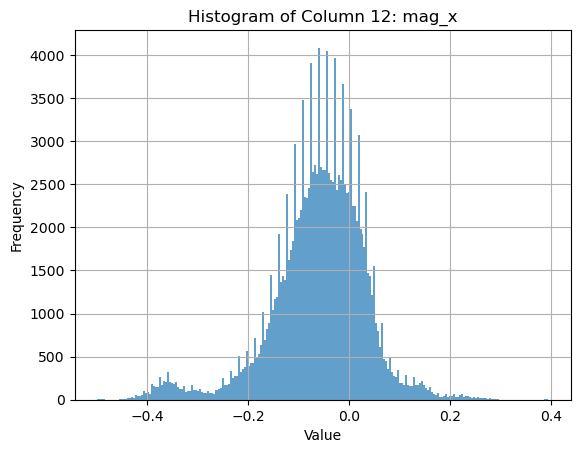

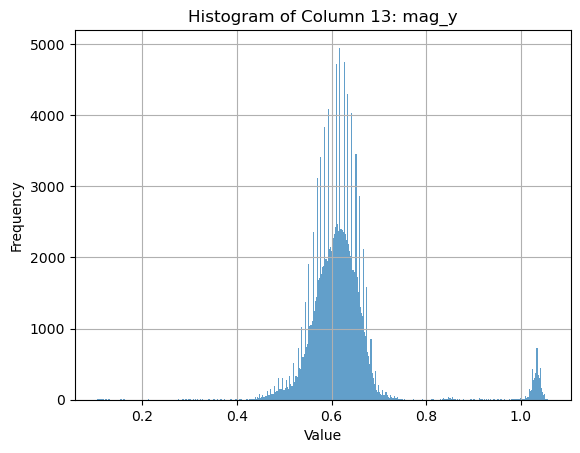

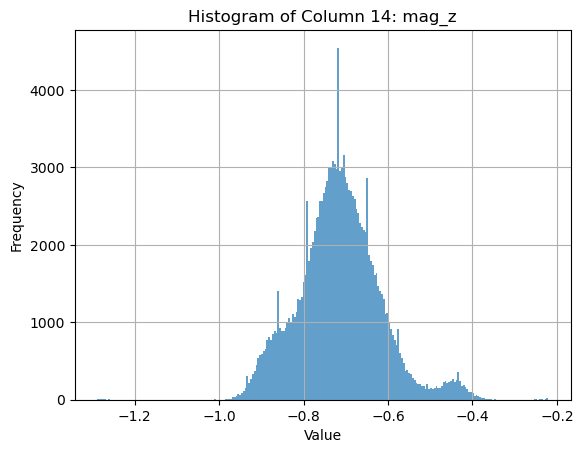

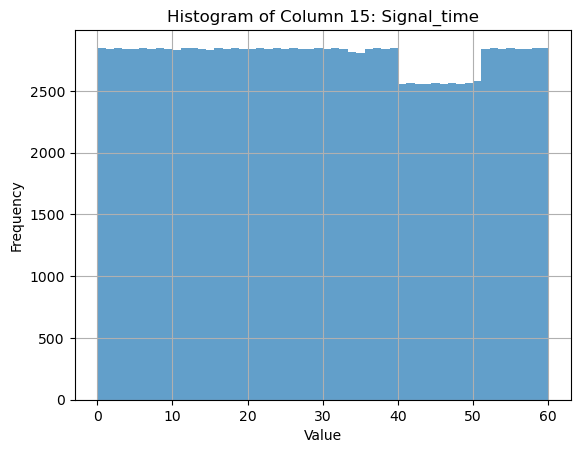

In [51]:
s1_hrsb_header = ["chestecg", "wrist_ppg", "wrist_gyro_x", "wrist_gyro_y", "wrist_gyro_z", 
                  "ln_accel_x", "ln_accel_y", "ln_accel_z", "wr_accel_x", "wr_accel_y", "wr_accel_z",
                  "mag_x", "mag_y", "mag_z", "Signal_time"]

# Iterate over each column in the signal_data
for col_idx in range(signal_data.shape[1]):
    column_data = signal_data[:, col_idx]
    
    # Plot histogram
    plt.figure()
    plt.hist(column_data, bins='auto', alpha=0.7)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Column {col_idx+1}: {s1_hrsb_header[col_idx]}')
    plt.grid(True)
    plt.show()

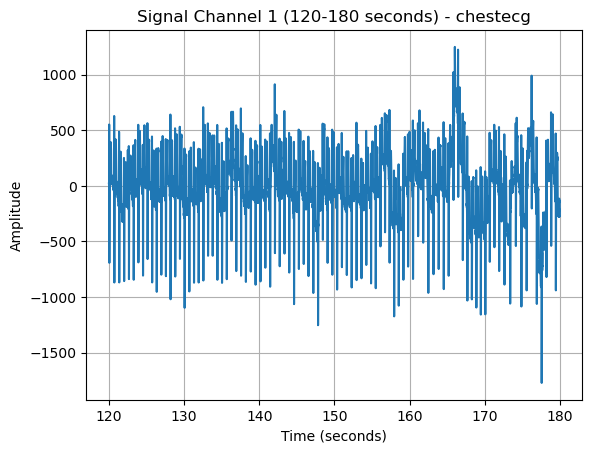

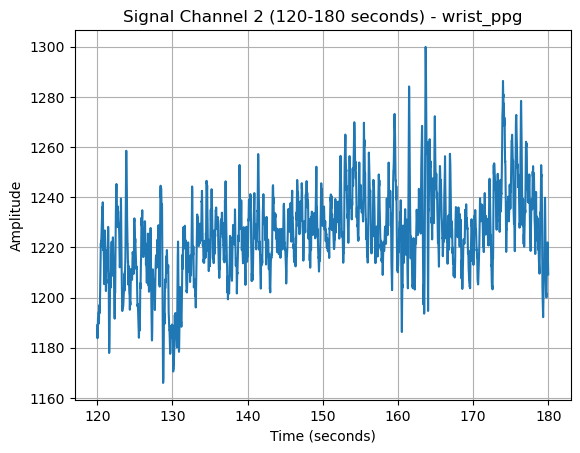

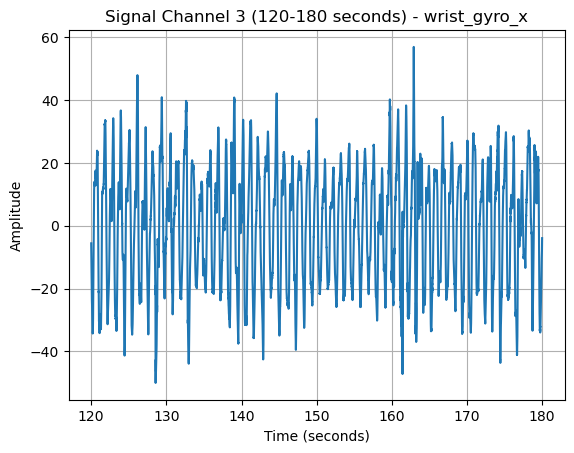

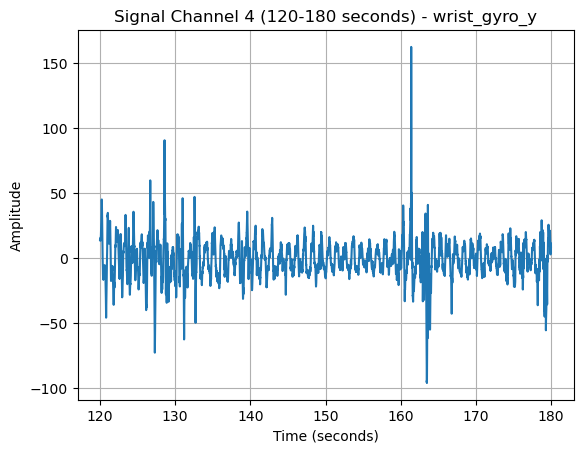

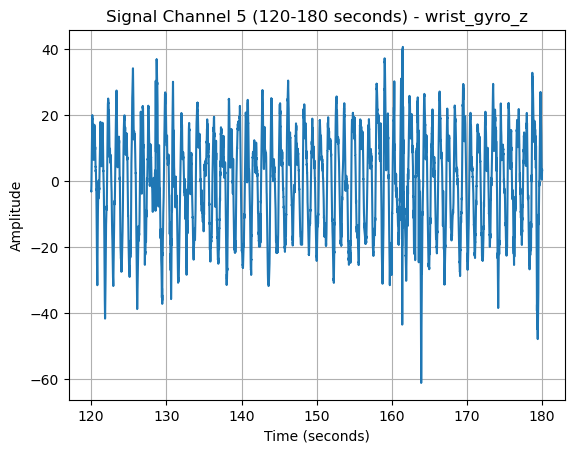

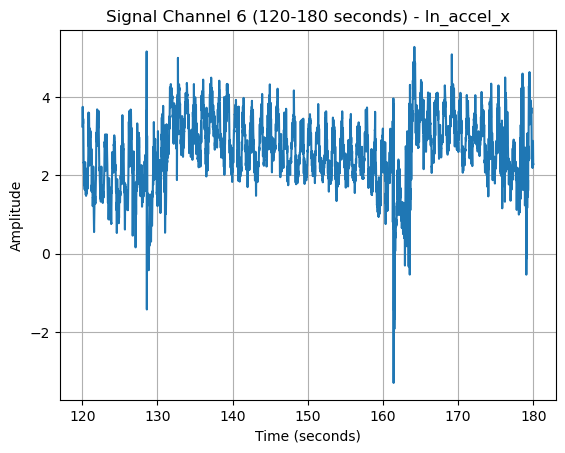

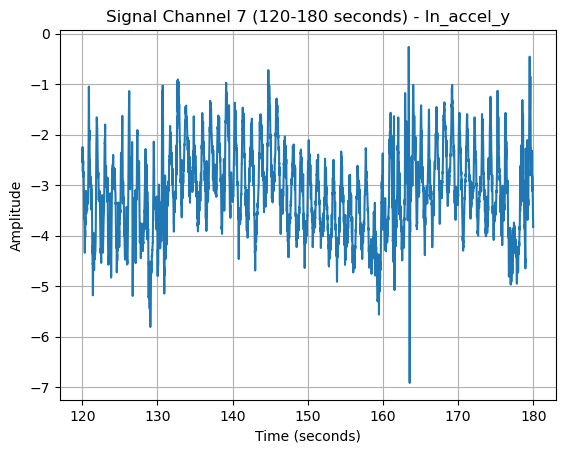

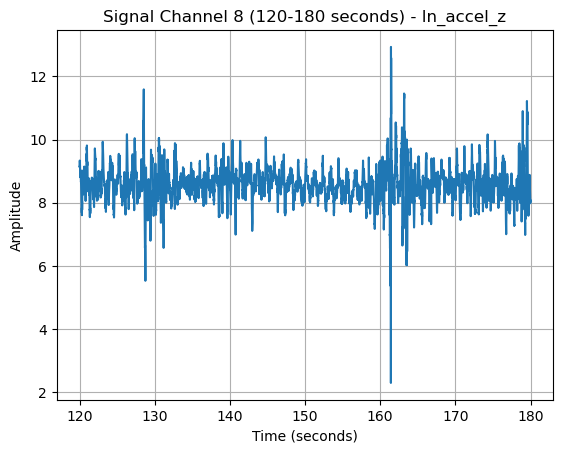

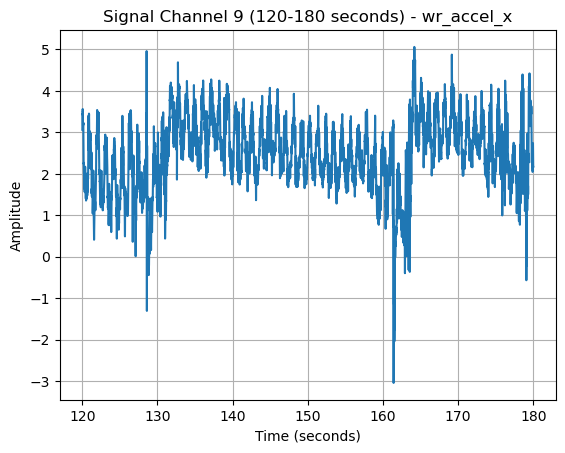

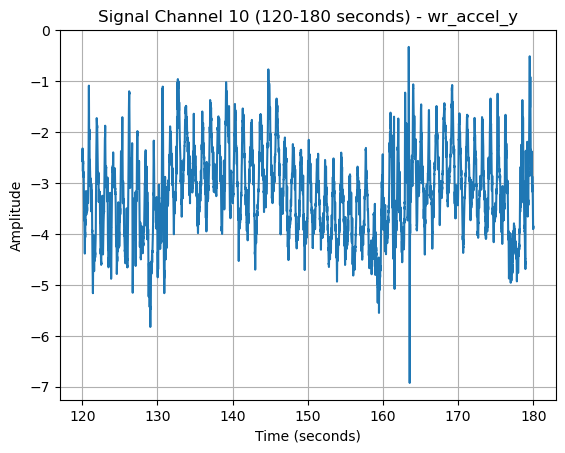

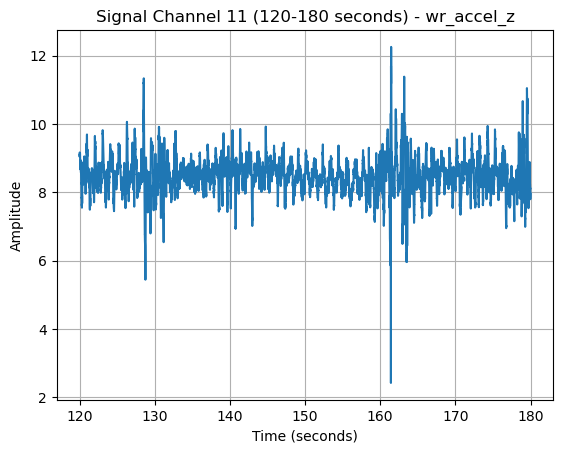

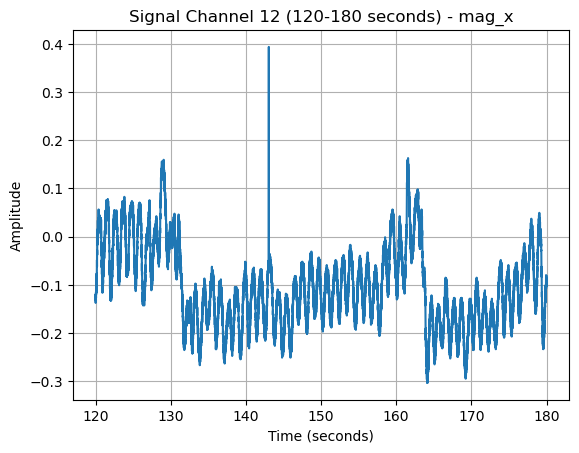

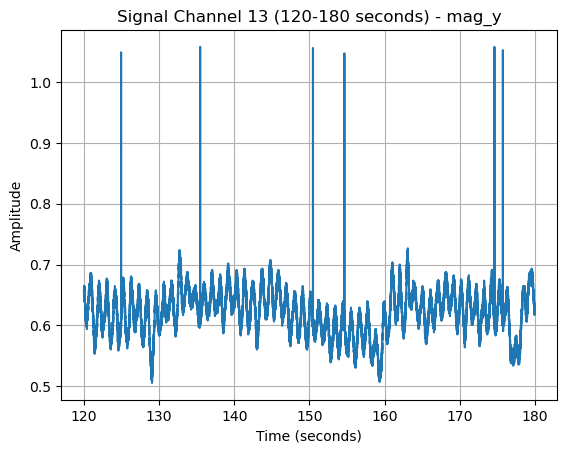

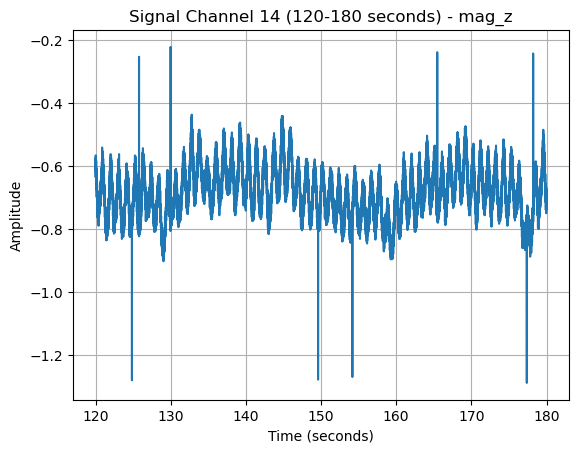

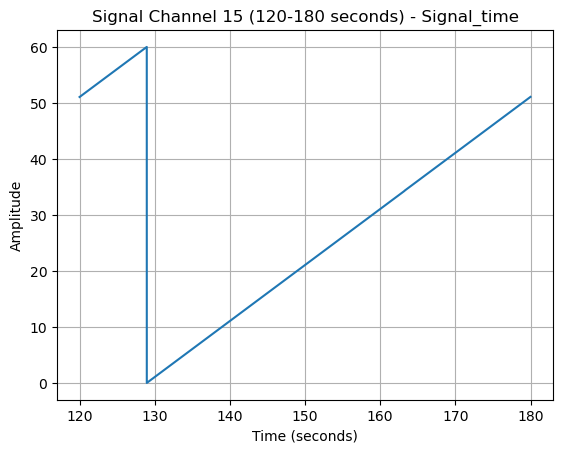

In [58]:
start_time = 120  # Start time in seconds
end_time = 180  # End time in seconds

# Calculate the corresponding indices for the start and end times
start_index = int(start_time * sampling_frequency)
end_index = int(end_time * sampling_frequency)

# Create a time axis for the specified time range
time_range = [i / sampling_frequency for i in range(start_index, end_index)]

# Extract the signal data for the specified time range
signal_data_range = signal_data[start_index:end_index, :]

# Plot each signal channel for the specified time range
num_channels = signal_data_range.shape[1]
for channel in range(num_channels):
    plt.figure()
    plt.plot(time_range, signal_data_range[:, channel])
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.title(f'Signal Channel {channel+1} ({start_time}-{end_time} seconds) - {s1_hrsb_header[channel]}')
    plt.grid(True)
    plt.show()


In [ ]:
#hm